In [1]:
import matplotlib

import matplotlib.font_manager as fm

font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

font_name = fm.FontProperties(fname = font_location).get_name()

matplotlib.rc('font',family = font_name)

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix

In [3]:
# 데이터 불러오기
df_raw=pd.read_csv("HMEQ.csv", engine="python")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [4]:
# 데이터 전처리
# 결측치 확인
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [5]:
# fillna:결측치 대체 함수

# job 변수의 결측치는 other로 대체, inplace: fillna 함수 적용 후 df_Raw 데이터에 저장, false면 저장 안함
df_raw["JOB"].fillna("Other", inplace=True)

# 숫자형 변수의 결측치는 해당 변수의 평균값 입력: df_raw.mean() 각 변수별 평균 계산 후 결측치 대체
df_raw.fillna(df_raw.mean(), inplace=True)

In [6]:
# 데이터 구성-더미변수 생성
# get_dummies: 데이터와 문자형 변수에 대한 더미변수 생성
df_raw_dummy=pd.get_dummies(df_raw)

# 더미변수 생성된 데이터의 상위 5개 row를 확인
df_raw_dummy.head()
df_raw_dummy.isnull().sum(axis=0)

BAD               0
LOAN              0
MORTDUE           0
VALUE             0
YOJ               0
DEROG             0
DELINQ            0
CLAGE             0
NINQ              0
CLNO              0
DEBTINC           0
REASON_DebtCon    0
REASON_HomeImp    0
JOB_Mgr           0
JOB_Office        0
JOB_Other         0
JOB_ProfExe       0
JOB_Sales         0
JOB_Self          0
dtype: int64

In [9]:
# 목표변수, 설명변수 데이터 지정
df_raw_y=df_raw_dummy["BAD"]
df_raw_x=df_raw_dummy.drop("BAD", axis=1, inplace=False)

#train_test_split(x: 설명변수 데이터, y: 목표변수 데이터, test_size=test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y=train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))


train data X size : (2623, 18)
train data Y size : (2623,)
test data X size : (1125, 18)
test data Y size : (1125,)


In [10]:
svm_uncustomized=SVC(random_state=1234)
svm_uncustomized.fit(df_train_x, df_train_y)

# train set 정확도
print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))

# test set 정확도
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on training set: 1.000
Accuracy on test set: 0.908


In [ ]:
# 120쪽
# svc 모델 파라미터 변경
# c 규제에 대한 강도 변경
# train 및 test 정확도 결과 저장용
train_accuracy=[]
test_accuracy=[]

# c: 규제(0.01, 0.1, 1, 10)
para_c=[10**c for c in range(-2, 2)]

for v_C in para_c:
    svm=SVC(C=v_C, random_state=1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_c=pd.DataFrame()
df_accuracy_c["C"]=para_c
df_accuracy_c["TrainAccuracy"]=train_accuracy
df_accuracy_c["TestAccuracy"]=test_accuracy

In [ ]:
# 121쪽
# SVC 모델 파라미터 변경
# C 규제에 대한 강도 변경 결과

# C별 정확도 테이블
df_accuracy_c.round(3)
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("C")
plt.legend()

In [ ]:
# 122쪽
# svc 모델 파라미터 변경
# gamma 훈련 샘플이 미치는 영향의 범위를 변경
# train 및  test 정확도 결과 저장용
train_accuracy=[]
test_accuracy=[]

# gamma 규제(0.01, 0.1, 1, 10)
para_gamma=[10**gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma, C=0.1, random_state=1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma["gamma"]=para_gamma
df_accuracy_gamma["TrainAccuracy"]=train_accuracy
df_accuracy_gamma["TestAccuracy"]=test_accuracy

In [ ]:
# 123쪽
# svc 모델 파라미터 변경
# gamma: 훈련 샘플이 미치는 영향의 범위를 변경 결과
# gamma별 정확도 테이블
df_accuracy_gamma.round(4)

# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("gamma")
plt.legend()

In [ ]:
# 124쪽
# scale 변환
# standardscaler 설명변수 값의 구간을 동일하게 변경

# 변수명 저장
v_feature_name=df_train_x.columns

# StandardScaler 적용
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()


In [11]:
# 데이터 분할

In [12]:
# 125쪽
# scale 조절 후 SVC 모델 재실행
# scale이 조정된 데이터로 새로운 모델 생성
svm_scaled=SVC(random_state=1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)

# train set 정확도
print("Accuracy on training set: {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))

# test set 정확도
print("Accuracy on test set: {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

NameError: name 'df_scaled_train_x' is not defined

In [ ]:
# 126쪽
# 새로운 svc 모델 파라미터 변경
# c: 규제에 대한 강도 변경

# train 및 test 정확도 결과 저장용
train_accuracy=[]
test_accuracy=[]

# c 규제
para_c=[10**c for c in range(-2, 2)]

for v_C in para_c:
    svm=SVC(C=v_C, random_state=1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_c=pd.DataFrame()
df_accuracy_c["C"]=para_c
df_accuracy_c["TrainAccuracy"]=train_accuracy
df_accuracy_c["TestAccuracy"]=test_accuracy

In [ ]:
# 127쪽
# 새로운 svc 모델 평가
# c 규제에 대한 강도 변경
# c 별 정확도 테이블
df_accuracy_c.round(3)

# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_c, test_accuracy, linestype="--", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("C")
plt.legend()

In [ ]:
# 임의로 지정
C=1

In [ ]:
# 128쪽
# 새로운 SVC 모델 PARAMETER 변경
# 감마: 훈련 샘플이 미치는 영향의 범위를 변경 결과

# TRAIN 및 TEST 정확도 결과 저장용
train_accuracy=[]
test_accuracy=[]

# gamma 규제
para_gamma=[10**gamma for gamma in range(-2, 2)]

for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma, C=1, random_state=1234)
    svm.fit(df_scaled_train_x,, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma["gamma"]=para_gamma
df_accuracy_gamma["TrainAccuracy"]=train_accuracy
df_accuracy_gamma["TestAccuracy"]=test_accuracy

In [ ]:
# 새로운 SVC 모델 평가
# GAMMA: 훈련 샘플이 미치는 영향의 범위를 변경 결롸
# GAMMA 별 정확도 테이블
df_accuracy_gamma.round(3)

# gamma별 정확도 그래프로 확인
plt.plot(para_gamma, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("gamma")
plt.legend()

In [ ]:
# 임의로 지정
gamma=0.1

In [ ]:
# 결론 도출
# 최종 모델 선택
svc_final=SVC(gamma=0.1, C=1, random_state=1234)
svc_final.fit(df_scaled_train_x, df_train_y)

# 평가
y_pred=svc_final.predict(df_scaled_test_x)

# train set 정확도
print("Accuracy on training set: {:.3f}".format(svm_final.score(df_scaled_train_x, df_train_y)))

# test set 정확도
print("Accuracy on test set: {:.3f}".format(svm_final.score(df_scaled_test_x, df_test_y)))

# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

In [ ]:
# 131쪽
# 서포트 벡터 머신 파라미터 조정 추가
# gridsearchcv 를 이용한 최적 파라미터 찾기
estimator=SVC(random_state=1234)

# 구하고자 하는 parameter와 범위
param_grid={"C": para_c,
           "gamma": para_gamma}

# 정확도가 높은 최적 파라미터 찾기
grid_rf=GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_rf.fir(df_scaled_train_x, df_train_y)
print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

In [17]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix

In [20]:
# 151쪽.
# 기본 옵션
nn_uncustomized=MLPClassifier(random_state=1234)

# hidden_layer_sizes=(100,100)
nn_uncustomized.fit(df_train_x, df_train_y)

# train accuracy
print("Accuracy on training set: {:.3f}".format(nn_uncustomized.score(df_train_x, df_train_y)))

# test accuracy
print("Accuracy on test set:{:.3f}".format(nn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.910
Accuracy on test set:0.909


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
#### 모델 정확

In [22]:
# 152쪽
# hidden layer: 은닉층 변경
# train 및 test 정확도 결과 저장용
train_accuracy=[]
test_accuracy=[]

# hidden_layer_sizes: 은닉층 변경
para_hidden=[20*hidden for hidden in range(1,9)]

for v_hidden in para_hidden:
    nn=MLPClassifier(hidden_layer_sizes=v_hidden, random_state=1234)
    
# nn=MLPClassifier(hidden_layer_sizes=(v_hidden, v_hidden), random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_hidden=pd.DataFrame()
df_accuracy_hidden["HiddenLayer"]=para_hidden
df_accuracy_hidden["TrainAccuracy"]=train_accuracy
df_accuracy_hidden["TestAccuracy"]=test_accuracy

# 은닉층별 정화곧 테이블
df_accuracy_hidden.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.909,0.904
1,40,0.910,0.912
2,60,0.910,0.908
3,80,0.907,0.904
4,100,0.910,0.909
5,120,0.129,0.123
6,140,0.910,0.909
7,160,0.910,0.909


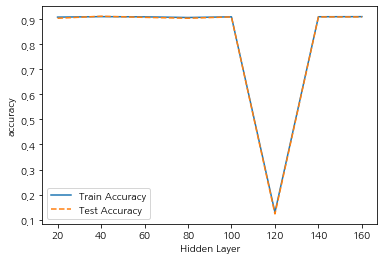

In [23]:
#153쪽
# 모델 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("Hidden Layer")
plt.legend()

In [25]:
# 154쪽.
# train 및 test 정확도 결과 저장용
train_accuracy=[]
test_accuracy=[]

# activation 변경
para_function=["logistic", "tanh", "relu"]

for v_function in para_function:
    nn=MLPClassifier(activation=v_function, random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_function=pd.DataFrame()
df_accuracy_function["ActivationFunction"]=para_function
df_accuracy_function["TrainAccuracy"]=train_accuracy
df_accuracy_function["TestAccuracy"]=test_accuracy

# activation function별 정확도 테이블
df_accuracy_function.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.908,0.908
1,tanh,0.908,0.908
2,relu,0.910,0.909


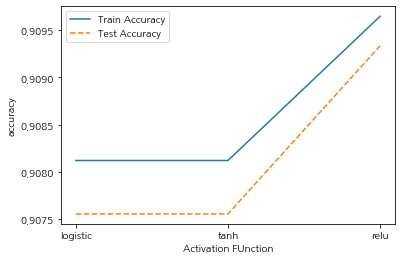

In [28]:
# 모델 정확도 그래프 확인
plt.plot(para_function, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("Activation FUnction")
plt.legend()

In [29]:
# 156쪽
# standardscaler 설명변수 scale 변경
# 변수명 저장
v_feature_name=df_train_x.columns

# standardscaler 적용
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,-1.548549,1.548549,2.618672,-0.446497,-0.828257,-0.574064,-0.131804,-0.189556
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556


In [30]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x=train_test_split(df_scaled, test_size=0.3, random_state=1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size: {}".format(df_scaled_test_x.shape))

train data X size : (2623, 18)
test data X size: (1125, 18)


In [31]:
# 157쪽
# scale 조절 후 SVC 모델 재실행
# scale이 조정된 데이터로 새로운 모델 생성
nn_scaled=MLPClassifier(random_state=1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)

# train set 정확도
print("Accuracy on training set: {:.3f}".format(nn_scaled.score(df_scaled_train_x, df_train_y)))

# test set 정확도
print("Accuracy on test set: {:.3f}".format(nn_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.971
Accuracy on test set: 0.943


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [32]:
# 158쪽
# hidden layer: 은닉층 변경

# train 및 test 정확도 결과 저장용
train_accuracy=[]
test_accuracy=[]

# hidden_layer_size: 은닉층 변경
para_hidden=[20*hidden for hidden in range(1,11)]

for v_hidden in para_hidden:
    # nn=MLPClassifier(hidden_layer_size=v_hidden, random_state=1234)
    nn=MLPClassifier(hidden_layer_sizes=(v_hidden, v_hidden), random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))\
    
# 데이터 테이블로 저장
df_accuracy_hidden=pd.DataFrame()
df_accuracy_hidden["HiddenLayer"]=para_hidden
df_accuracy_hidden["TrainAccuracy"]=train_accuracy
df_accuracy_hidden["TestAccuracy"]=test_accuracy

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

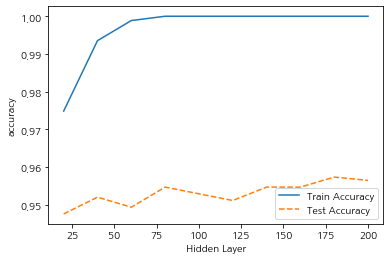

In [33]:
# 159쪽
# hidden layer: 은닉층 변경 결과
# 은닉층별 정확도 테이블
df_accuracy_hidden.round(3)
# 모델 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("Hidden Layer")
plt.legend()

In [34]:
# 160쪽
# activation 활성화 함수 변수

# train 및 test 정확도 결과 저장용
train_accuracy=[]
test_accuracy=[]
# activation 변경
para_function=["logistic", "tanh", "relu"]

for v_function in para_function:
    nn=MLPClassifier(activation=v_function, hidden_layer_sizes=(80,80), random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_function=pd.DataFrame()
df_accuracy_function["ActivationFunction"]=para_function
df_accuracy_function["TrainAccuracy"]=train_accuracy
df_accuracy_function["TestAccuracy"]=test_accuracy

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


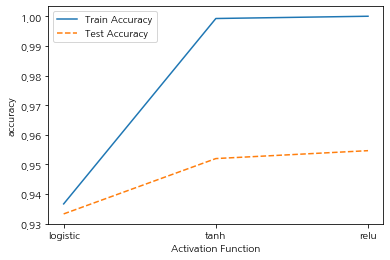

In [35]:
# 161쪽
# activation function 별 정확도 테이블
df_accuracy_function.round(3)
#Activation function별 정확도 그래프로 확인
plt.plot(para_function, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("Activation Function")
plt.legend()

In [37]:
# 162쪽
# solver: 가중치 최적화 변경
# train 및 test 정확도 결과 저장용
train_accuracy=[]
test_accuracy=[]
# solver 변경
para_solver=["lbfgs", "sgd", "adam"]

for v_solver in para_solver:
    nn=MLPClassifier(solver=v_solver, activation="relu", hidden_layer_sizes=(80,80), random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_solver=pd.DataFrame()
df_accuracy_solver["Solver"]=para_solver
df_accuracy_solver["TrainAccuracy"]=train_accuracy
df_accuracy_solver["TestAccuracy"]=test_accuracy


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


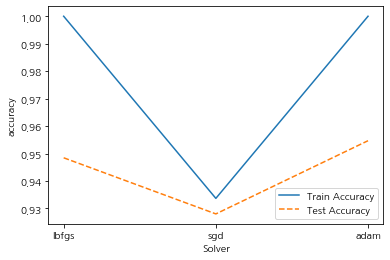

In [38]:
# 163쪽
# 새로운 MLPClassifier 모델 평가
# Solver: 가중치 최적화 변경 결과

# solver별 정확도 테이블
df_accuracy_solver.round(3)

# 정확도 그래프 표현
plt.plot(para_solver, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("Solver")
plt.legend()

In [39]:
# 164쪽
# 새로운 MLPClassifier 모델 평가
# Mini Batch 변경

# train 및 test 정확도 결과 저장용
train_accuracy=[]
test_accuracy=[]

# mini batch 변경
para_batch=[20*batch for batch in range(1,10)]

for v_batch in para_batch:
    nn=MLPClassifier(batch_size=v_batch, solver="adam", activation="relu",
                    hidden_layer_sizes=(80,80), random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_batch=pd.DataFrame()
df_accuracy_batch["Mini Batch"]=para_batch
df_accuracy_batch["TrainAccuracy"]=train_accuracy
df_accuracy_batch["TestAccuracy"]=test_accuracy

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

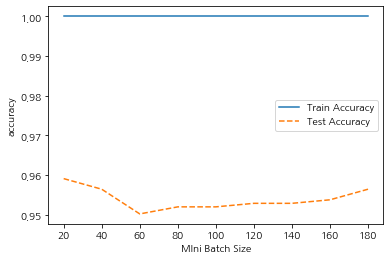

In [40]:
# 165쪽
# 새로운 MLPClassifier 모델 평가
# Mini Batch 변경 결과

# Mini Batch Size별 정확도 테이블
df_accuracy_batch.round(3)

# 정확도 그래프 표현
plt.plot(para_batch, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("MIni Batch Size")
plt.legend()

In [41]:
# 166쪽
# 결론 도출
# 최종 모델 선택

nn_final=MLPClassifier(hidden_layer_sizes=(80,80), activation="relu", solver="adam",
                       batch_size=100, random_state=1234)
nn_final.fit(df_scaled_train_x, df_train_y)

# 평가
y_pred=nn_final.predict(df_scaled_test_x)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(nn_final.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(nn_final.score(df_scaled_test_x, df_test_y)))
# confusion matrix
print("COnfusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 1.000
Accuracy on test set: 0.952

COnfusion matrix: 
[[1018    3]
 [  51   53]]


In [43]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix

In [44]:
# 데이터 불러오기
df_raw=pd.read_csv("HMEQ.csv", engine="python")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [45]:
# 데이터 전처리
# 결측치 확인
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [46]:
# fillna:결측치 대체 함수

# job 변수의 결측치는 other로 대체, inplace: fillna 함수 적용 후 df_Raw 데이터에 저장, false면 저장 안함
df_raw["JOB"].fillna("Other", inplace=True)

# 숫자형 변수의 결측치는 해당 변수의 평균값 입력: df_raw.mean() 각 변수별 평균 계산 후 결측치 대체
df_raw.fillna(df_raw.mean(), inplace=True)

In [47]:
# 데이터 구성-더미변수 생성
# get_dummies: 데이터와 문자형 변수에 대한 더미변수 생성
df_raw_dummy=pd.get_dummies(df_raw)

# 더미변수 생성된 데이터의 상위 5개 row를 확인
df_raw_dummy.head()
df_raw_dummy.isnull().sum(axis=0)

BAD               0
LOAN              0
MORTDUE           0
VALUE             0
YOJ               0
DEROG             0
DELINQ            0
CLAGE             0
NINQ              0
CLNO              0
DEBTINC           0
REASON_DebtCon    0
REASON_HomeImp    0
JOB_Mgr           0
JOB_Office        0
JOB_Other         0
JOB_ProfExe       0
JOB_Sales         0
JOB_Self          0
dtype: int64

In [48]:
# 데이터 구성-더미변수 생성
# get_dummies: 데이터와 문자형 변수에 대한 더미변수 생성
df_raw_dummy=pd.get_dummies(df_raw)

# 더미변수 생성된 데이터의 상위 5개 row를 확인
df_raw_dummy.head()
df_raw_dummy.isnull().sum(axis=0)

BAD               0
LOAN              0
MORTDUE           0
VALUE             0
YOJ               0
DEROG             0
DELINQ            0
CLAGE             0
NINQ              0
CLNO              0
DEBTINC           0
REASON_DebtCon    0
REASON_HomeImp    0
JOB_Mgr           0
JOB_Office        0
JOB_Other         0
JOB_ProfExe       0
JOB_Sales         0
JOB_Self          0
dtype: int64

In [49]:
# 목표변수, 설명변수 데이터 지정
df_raw_y=df_raw_dummy["BAD"]
df_raw_x=df_raw_dummy.drop("BAD", axis=1, inplace=False)

#train_test_split(x: 설명변수 데이터, y: 목표변수 데이터, test_size=test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y=train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))


train data X size : (2623, 18)
train data Y size : (2623,)
test data X size : (1125, 18)
test data Y size : (1125,)


In [51]:
# 176쪽
# 기본 옵션으로 모델 생성
# knn 모델 생성
knn_uncustomized=KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))

# test set 정확도
print("Accuracy on test set: {:.3f}".format(knn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.916
Accuracy on test set: 0.908


In [56]:
# 177쪽
# 모델 생성
# 이웃 수 증가에 따른 정확도 변화

# train 및 test 정확도 결과 저장용
train_accuracy=[]
test_accuracy=[]

# 최대 이웃 수: 1-15
para_n_neighbors=[i for i in range(1,16)]


for v_n_neighbors in para_n_neighbors:
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_neighbors=pd.DataFrame()
df_accuracy_neighbors["Neighbors"]=para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"]=train_accuracy
df_accuracy_neighbors["TestAccuracy"]=test_accuracy
df_accuracy_neighbors["TestAccuracy"]=test_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.877
1,2,0.928,0.912
2,3,0.929,0.913
3,4,0.916,0.914
4,5,0.916,0.908
5,6,0.913,0.911
6,7,0.913,0.912
7,8,0.910,0.912
8,9,0.911,0.913
9,10,0.909,0.910


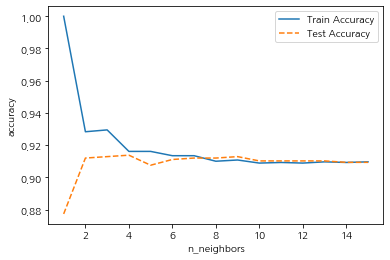

In [57]:
# 178쪽
# 이웃 수 증가에 따른 정확도 변화
# 모델 정확도 그래프 확인
plt.plot(para_n_neighbors, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [ ]:
# 179쪽
# 가중치별 이웃 수 증가에 따른 정확도 변화

# train 및 test 정확도 결과 저장용
train_accuracy=[]
test_accuracy=[]

# 이웃 수
para_n_neighbors=[i for i in range(1,11)]*2

# 가중치
para_weights=(["uniform"])*10+(["distance"]*10)

for (v_n_neighbors, v_weights)